In [84]:
from pandas import read_csv 
filename = 'breast_cancer_data.csv' 


data = read_csv(filename) 
array = data.values 
df=data.drop(columns=['Unnamed: 0'])
df.head(5)
df.tail(5)


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Target
295,5,5,7,8,6,10,7,4,1,1
296,5,3,4,3,4,5,4,7,1,0
297,5,4,3,1,2,1,2,3,1,0
298,8,2,1,1,5,1,1,1,1,0
299,9,1,2,6,4,10,7,7,2,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022A79551EB8>,
      dtype=object)

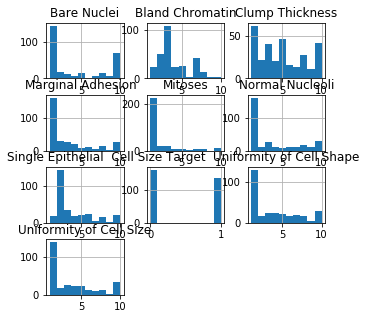

In [85]:
# Univariate Density Plots 
from matplotlib import pyplot
import seaborn as sns
from pandas import read_csv 
import pandas as pd
filename = 'breast_cancer_data.csv' 


data = read_csv(filename) 
array = data.values 
df=data.drop(columns=['Unnamed: 0'])
df
#df.plot(kind='density' , subplots=True, layout=(4,4), sharex=False) 
#pyplot.tight_layout()
#pyplot.show()
df=pd.DataFrame(df)
pd.DataFrame.hist(df,figsize=[5,5])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022A7A403E10>,
      dtype=object)

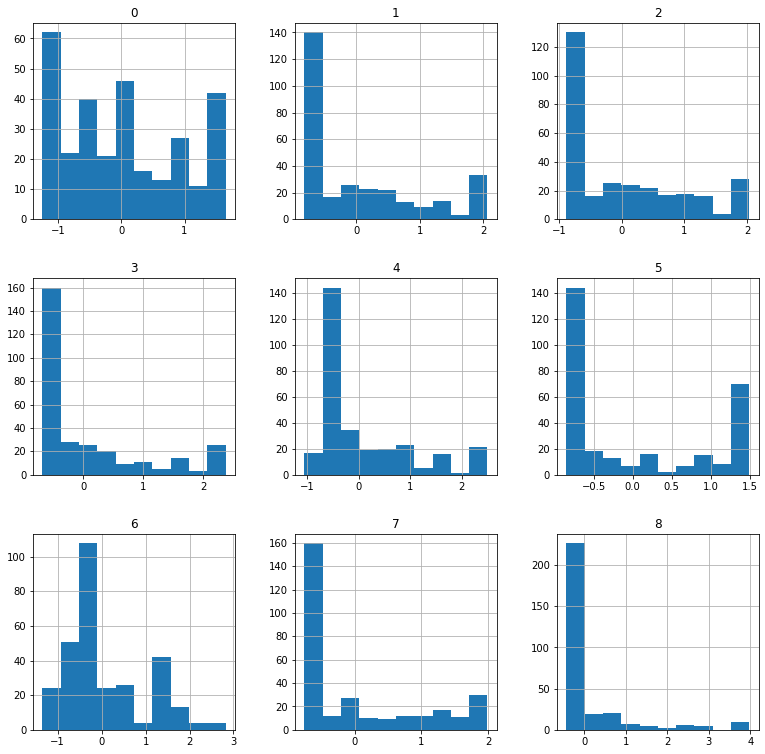

In [55]:
# Univariate Density Plots 
from matplotlib import pyplot 
from pandas import read_csv 
from sklearn.preprocessing import StandardScaler
filename = 'breast_cancer_data.csv' 


data = read_csv(filename) 
array = data.values 
df=data.drop(columns=['Unnamed: 0'])

array_new=df.values
X = array_new[:,0:9] 
Y = array_new[:,9] 

#using normalizer
scaler = StandardScaler().fit(X) 
rescaledX = scaler.transform(X) 
df=pd.DataFrame(rescaledX)
pd.DataFrame.hist(df,figsize=[13,13])

D:\data_science\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\data_science\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\data_science\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\data_science\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\data_science\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\data_science

 LR: 0.866667 (0.080277)
 LDA: 0.853333 (0.081921)
 KNN: 0.893333 (0.074237)
 CART: 0.873333 (0.067987)
 NB: 0.890000 (0.063333)


D:\data_science\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\data_science\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\data_science\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\data_science\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will 

 SVM: 0.876667 (0.078951)


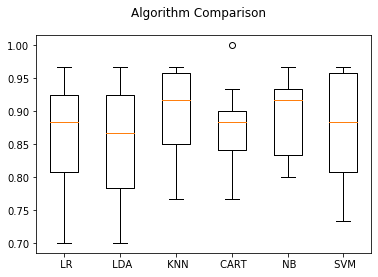

In [14]:
# Compare Algorithms with Normalized dataset
from pandas import read_csv 
from matplotlib import pyplot 
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC 

#loading data
filename = 'breast_cancer_data.csv' 


data = read_csv(filename) 
array = data.values 
df=data.drop(columns=['Unnamed: 0'])

array_new=df.values
X = array_new[:,0:9] 
Y = array_new[:,9] 

#using normalizer
scaler = Normalizer().fit(X) 
normalizedX = scaler.transform(X) 


# prepare models 
models = [] 
models.append((' LR' , LogisticRegression())) 
models.append((' LDA' , LinearDiscriminantAnalysis())) 
models.append((' KNN' , KNeighborsClassifier())) 
models.append((' CART' , DecisionTreeClassifier())) 
models.append((' NB' , GaussianNB())) 
models.append((' SVM' , SVC()))

# evaluate each model in turn 
results = [] 
names = [] 
scoring = 'accuracy' 
for name, model in models: 
    kfold = KFold(n_splits=10, random_state=7) 
    cv_results = cross_val_score(model, normalizedX, Y, cv=kfold, scoring=scoring) 
    results.append(cv_results)
    names.append(name) 
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) 
    print(msg)
# boxplot algorithm comparison 
fig = pyplot.figure() 
fig.suptitle('Algorithm Comparison') 
ax = fig.add_subplot(111) 
pyplot.boxplot(results) 
ax.set_xticklabels(names)
pyplot.show()

D:\data_science\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\data_science\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\data_science\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\data_science\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\data_science\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\data_science

 LR: 0.946667 (0.040000)
 LDA: 0.930000 (0.056667)
 KNN: 0.953333 (0.037118)
 CART: 0.913333 (0.047610)
 NB: 0.940000 (0.041633)
 SVM: 0.956667 (0.030000)


D:\data_science\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\data_science\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\data_science\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\data_science\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will 

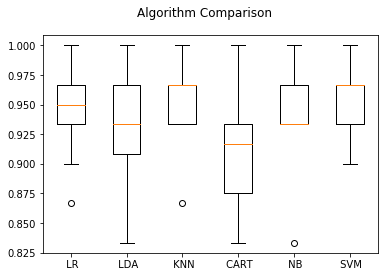

In [56]:
# Compare Algorithms using rescaled dataset

from pandas import read_csv 
from matplotlib import pyplot 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC 

#loading data
filename = 'breast_cancer_data.csv' 


data = read_csv(filename) 
array = data.values 
df=data.drop(columns=['Unnamed: 0'])

array_new=df.values
X = array_new[:,0:9] 
Y = array_new[:,9] 

#using normalizer
scaler = StandardScaler().fit(X) 
rescaledX = scaler.transform(X) 


# prepare models 
models = [] 
models.append((' LR' , LogisticRegression())) 
models.append((' LDA' , LinearDiscriminantAnalysis())) 
models.append((' KNN' , KNeighborsClassifier())) 
models.append((' CART' , DecisionTreeClassifier())) 
models.append((' NB' , GaussianNB())) 
models.append((' SVM' , SVC()))

# evaluate each model in turn 
results = [] 
names = [] 
scoring = 'accuracy' 
for name, model in models: 
    kfold = KFold(n_splits=10, random_state=7) 
    cv_results = cross_val_score(model, rescaledX, Y, cv=kfold, scoring=scoring) 
    results.append(cv_results)
    names.append(name) 
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) 
    print(msg)
# boxplot algorithm comparison 
fig = pyplot.figure() 
fig.suptitle('Algorithm Comparison') 
ax = fig.add_subplot(111) 
pyplot.boxplot(results) 
ax.set_xticklabels(names)
pyplot.show()

In [74]:
# Using SandardScaler Feature extraction using PCA
import pandas as pd
from numpy import set_printoptions
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
#loading data
filename = 'breast_cancer_data.csv' 


data = read_csv(filename) 
array = data.values 
df=data.drop(columns=['Unnamed: 0'])

array_new=df.values
X = array_new[:,0:9] 
Y = array_new[:,9] 
#using normalizer
scaler = StandardScaler().fit(X) 
rescaledX = scaler.transform(X) 

# feature extraction 
pca = PCA(n_components=3) 
fit = pca.fit(rescaledX) 

# summarize components 
print("Explained Variance: %s" % fit.explained_variance_ratio_) 
print(fit.components_)
pd.DataFrame(fit.components_[0].reshape(1, 9).tolist(), columns=df.columns[:-1]).T.sort_values(0, ascending=False)

Explained Variance: [0.62098829 0.0892504  0.06537649]
[[ 0.32201987  0.38526805  0.38547882  0.32411175  0.33021418  0.33418364
   0.32620402  0.34046207  0.22624278]
 [-0.0507397  -0.03933071 -0.07034688 -0.02774506  0.13228271 -0.2397059
  -0.29766188 -0.01335744  0.90907725]
 [-0.51665991 -0.24755632 -0.2746195   0.66429304 -0.17657166  0.23057924
   0.21065968  0.11295426  0.11660528]]


,0
Uniformity of Cell Shape,0.385479
Uniformity of Cell Size,0.385268
Normal Nucleoli,0.340462
Bare Nuclei,0.334184
Single Epithelial Cell Size,0.330214
Bland Chromatin,0.326204
Marginal Adhesion,0.324112
Clump Thickness,0.322020
Mitoses,0.226243


In [93]:
# Using SandardScaler Feature extraction using PCA
import pandas as pd
from numpy import set_printoptions
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.feature_selection import RFE
#loading data
filename = 'breast_cancer_data.csv' 


data = read_csv(filename) 
array = data.values 
df=data.drop(columns=['Unnamed: 0'])

array_new=df.values
X = array_new[:,0:9] 
Y = array_new[:,9] 

#using normalizer
scaler = StandardScaler().fit(X) 
rescaledX = scaler.transform(X) 



model = LogisticRegression() 
rfe = RFE(model, 3) 
fit = rfe.fit(rescaledX, Y) 
print("Num Features: %d" % fit.n_features_) 
print("Selected Features: %s" % fit.support_) 
print("Feature Ranking: %s" % fit.ranking_)
pd.DataFrame(fit.ranking_.reshape(1, 9).tolist(), columns=df.columns[:-1]).T.sort_values(0, ascending=True)

D:\data_science\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\data_science\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\data_science\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\data_science\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\data_science\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\data_science

Num Features: 3
Selected Features: [ True False  True False False  True False False False]
Feature Ranking: [1 7 1 5 4 1 2 6 3]


,0
Clump Thickness,1
Uniformity of Cell Shape,1
Bare Nuclei,1
Bland Chromatin,2
Mitoses,3
Single Epithelial Cell Size,4
Marginal Adhesion,5
Normal Nucleoli,6
Uniformity of Cell Size,7


                              Unnamed: 0  Clump Thickness  Uniformity of Cell Size  \
Unnamed: 0                         1.000            0.080                    0.091   
Clump Thickness                    0.080            1.000                    0.682   
Uniformity of Cell Size            0.091            0.682                    1.000   
Uniformity of Cell Shape           0.115            0.697                    0.915   
Marginal Adhesion                  0.100            0.473                    0.627   
Single Epithelial  Cell Size       0.002            0.498                    0.707   
Bare Nuclei                        0.164            0.572                    0.642   
Bland Chromatin                    0.073            0.534                    0.660   
Normal Nucleoli                    0.104            0.527                    0.681   
Mitoses                            0.017            0.370                    0.429   
Target                             0.057            0.

NameError: name 'numpy' is not defined

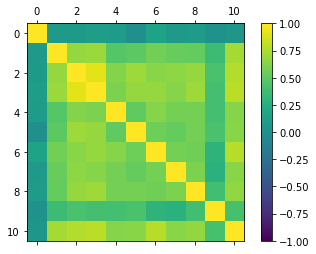

In [78]:
# Pairwise Pearson correlations 
from pandas import read_csv 
from pandas import set_option 

filename = "breast_cancer_data.csv" 
#names = ['preg' , 'plas' , 'pres' , 'skin' , 'test' , 'mass' , 'pedi' , 'age' , 'class'] 
data = read_csv(filename) 

data = read_csv(filename) 
array = data.values 
df=data.drop(columns=['Unnamed: 0'])

set_option('display.width', 100) 
set_option('precision', 3) 
correlations = data.corr(method='pearson' ) 
print(correlations)


# plot correlation matrix 
fig = pyplot.figure() 
ax = fig.add_subplot(111) 
cax = ax.matshow(correlations, vmin=-1, vmax=1) 
fig.colorbar(cax) 
ticks = numpy.arange(0,9,1) 
ax.set_xticks(ticks) 
ax.set_yticks(ticks) 
ax.set_xticklabels(names) 
ax.set_yticklabels(names) 
pyplot.show()

In [90]:
# Create a pipeline that extracts features from the data then creates a model with Rescaled
from pandas import read_csv 
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline 
from sklearn.pipeline import FeatureUnion 
from sklearn.linear_model import LogisticRegression 
from sklearn.decomposition import PCA 
from sklearn.feature_selection import SelectKBest 
from sklearn.metrics import classification_report 

#loading data
filename = 'breast_cancer_data.csv' 


data = read_csv(filename) 
array = data.values 
df=data.drop(columns=['Unnamed: 0'])

array_new=df.values
X = array_new[:,0:9] 
Y = array_new[:,9] 


# create feature union 
features = [] 
features.append(('rescaled' , StandardScaler())) 
features.append(('pca' , PCA(n_components=3))) 
features.append(('select_best' , SelectKBest(k=6))) 
feature_union = FeatureUnion(features) 

# create pipeline 
estimators = [] 
estimators.append(('feature_union' , feature_union)) 
#estimators.append(('logistic' , LogisticRegression())) 
#model = Pipeline(estimators)

#estimators.append((' LDA' , LinearDiscriminantAnalysis())) 
#model = Pipeline(estimators)

estimators.append((' KNN' , KNeighborsClassifier()))
model = Pipeline(estimators)


#estimators.append((' CART' , DecisionTreeClassifier()))
#model = Pipeline(estimators)

#estimators.append((' NB' , GaussianNB())) 
#model = Pipeline(estimators)

#estimators.append((' SVM' , SVC()))
#model = Pipeline(estimators)
# evaluate pipeline 
kfold = KFold(n_splits=20, random_state=7) 
results = cross_val_score(model, rescaledX, Y, cv=kfold) 
print(results.mean())
scoring = 'roc_auc' 
results = cross_val_score(model, rescaledX, Y, cv=kfold, scoring=scoring) 
print("AUC: %.3f (%.3f)" % (results.mean(), results.std()))

predicted = model.predict(X_test) 
report = classification_report(Y_test, predicted) 
print(report)

0.9600000000000002
AUC: 0.984 (0.029)


NameError: name 'X_test' is not defined